In [1]:
#@title Client profile

import random as rd
import pandas as pd
import numpy as np

class Client():
    
    def __init__(self, name,age):
        
        self.name = name
        self.age = age
        
    def choose_habits(self, number_limits,dict_habits):
        
        number_habits = rd.randint(0,number_limits)
        habits = []
        
        for _ in range(number_habits):
            
            habit = dict_habits[rd.randint(1,len(dict_habits)-1)]
            if habit in habits:
                pass
            else:
                habits.append(habit)
        return habits

In [2]:
#@title Create Random Profiles

def SelectRandomIdentity():
  dict_name = {
      0 : "Etienne",
      1: "Erwann",
      2: "Joseph",
      3:"Patrick",
      4:"Jean",
      5:"Louis",
      6:"Antoine"
  }
  random_name = dict_name[rd.randint(0,len(dict_name)-1)]
  random_age = rd.randint(18,70)
  return random_name,random_age

dict_habits = {
    1 : "boulangerie",
    2 : "espace vert",
    3 : "bricolage",
    4 : "fruitier",
    5 : "restaurants"
}


number_client = 100
clients = []

for _ in range(number_client):
  name,age = SelectRandomIdentity()
  client = Client(name,age)
  habits = client.choose_habits(3,dict_habits)
        
  clients.append([client.name,client.age,habits])
    
df_clients = pd.DataFrame(np.array(clients),
                   columns=['name', 'age', 'habits'])
    
            
            
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [3]:
#@title Create random bills

client_max_bill = 10
average_spent = 20
limit_spendable = 60
bill = []
dict_class_companies = {
    0 : "Alimentation",
    1:"Quincaillerie",
    2:"Urbain",
    3:'Restauration'
}

def ChooseCompany(dict_class_companies, companies_check):
  company = dict_class_companies[rd.randint(0,len(dict_class_companies) - 1)]
  if len(dict_class_companies) > 1:
    while company in companies_check: # check if the company category is already used
      company = dict_class_companies[rd.randint(0,len(dict_class_companies) - 1)]
      print(companies_check)
    companies_check.append(company)
  return company
  


for _ in range(len(df_clients)):

  number_bill = rd.randint(0,client_max_bill)
  client_bill = {}
  
  for _ in range(number_bill):
    amount_spent = rd.gauss(average_spent,15)
    if amount_spent > limit_spendable :
      amount_spent = limit_spendable
    elif amount_spent <= 0:
      amount_spent = 1
    companies_check = []
    company = ChooseCompany(dict_class_companies, companies_check)
    
    

    client_bill[company] = amount_spent
  bill.append(client_bill)

df_clients["bills"] = bill

In [4]:
#@title Define categories of the habits

def AttributeCategory(habit):

  # Amélioration possible : ici on est obligé de définir manuellement les catégories des habitudes
  dict_habit2category = {
    "boulangerie" : "Alimentation",
    "espace vert": "Urbain",
    "bricolage": "Quincaillerie",
    "fruitier" : "Alimentation",
    "restaurants": "Restauration"
  }

  try :
    return dict_habit2category[habit]
  except:
    return None
  habits_key = dict_habits.values()
  class_companies_values = dict_class_companies.values()

def Convert_habit2Category(clients_habits):
  habits2categories_list = []
  for client_habits in clients_habits:
    habits_categories = []
    for habit in client_habits:
      habit_category = AttributeCategory(habit)
      habits_categories.append(habit_category)
    
    habits2categories_list.append(habits_categories)
  
  df_clients["habits_categories"] = np.array(habits2categories_list)


Convert_habit2Category(df_clients["habits"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [5]:
#@title Estimate preferences
# Habits have a greater importance than the bills
# We accord 60% for the habits and 40% for the bills
habits_importance = 0.60 #@param
def EstimateHabitsWeight(category, habits):
  if category in habits:# We check if the client like this category
    weight = 1/len(habits)
    return weight
  else:
    return 0

def EstimateBillsWeight(category, bill):
  categories_in_bill = bill.keys() #What categories are present into the bill
  if category in categories_in_bill:
    total_spent = sum(bill.values())
    weight = bill[category] / total_spent
    return weight
  else:
    return 0 

Clients_preferences = []

for i in range(len(df_clients)):
  Client_preferences = [[dict_class_companies[j],0] for j in range(len(dict_class_companies))] # Preferences initatilisation
  Client_estimations = {}

  for j in range(len(Client_preferences)):
    Habits_estimation = EstimateHabitsWeight(Client_preferences[j][0], df_clients["habits_categories"][i])
    Bills_estimation = EstimateBillsWeight(Client_preferences[j][0],df_clients["bills"][i])
    Client_estimations[Client_preferences[j][0]] = Habits_estimation*habits_importance + (1-habits_importance)*Bills_estimation
  
  Clients_preferences.append(Client_estimations)
df_clients["Preferences"] = Clients_preferences
df_clients.head()

,name,age,habits,bills,habits_categories,Preferences
0,Louis,23,"[espace vert, bricolage]",{'Restauration': 9.895303569430741},"[Urbain, Quincaillerie]","{'Alimentation': 0.0, 'Quincaillerie': 0.3, 'U..."
1,Jean,61,"[espace vert, boulangerie, fruitier]","{'Alimentation': 23.807673802341235, 'Restaura...","[Urbain, Alimentation, Alimentation]","{'Alimentation': 0.28863004126480246, 'Quincai..."
2,Patrick,48,[],"{'Alimentation': 24.182453147665242, 'Quincail...",[],"{'Alimentation': 0.22803523986822638, 'Quincai..."
3,Joseph,48,[],{'Quincaillerie': 23.90993889744203},[],"{'Alimentation': 0.0, 'Quincaillerie': 0.4, 'U..."
4,Patrick,46,"[espace vert, bricolage]","{'Quincaillerie': 11.573782100211721, 'Urbain'...","[Urbain, Quincaillerie]","{'Alimentation': 0.009181418447526379, 'Quinca..."


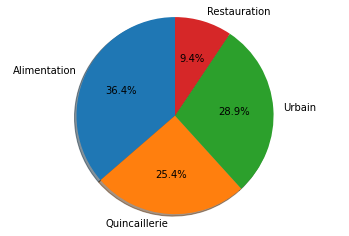

In [6]:
#@title Global Preferences Estimation
import seaborn as sns
import matplotlib.pyplot as plt

Client_weight = 10 # Un client possède n "jetons" à dispatcher selon ses préférences

# Initialisation
total_categories_preferences_keys = [dict_class_companies[j] for j in range(len(dict_class_companies))]
total_categories_preferences_values = [0 for j in range(len(dict_class_companies))]
total_categories_preferences = zip(total_categories_preferences_keys,total_categories_preferences_values)
total_categories_preferences = dict(total_categories_preferences)


for i in range(len(df_clients)):
  client_pref = df_clients["Preferences"][i]
  for keys in total_categories_preferences.keys():
    total_categories_preferences[keys] += client_pref[keys]

#Convert into a pourcentage
sum_total = sum(total_categories_preferences.values())
for total_key in total_categories_preferences.keys():
  total_categories_preferences[total_key] = total_categories_preferences[total_key]/sum_total

# Ploting the data
name = total_categories_preferences.keys()
data = total_categories_preferences.values()

plt.pie(data, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()